<img src="header.png" align="left"/>

# Anwendungsbeispiel Cleaning and transformation of data

Das Ziel dieses Beispieles ist es einige Aufgaben der Reinigung und Transformation von Daten zu erklären und den Effekt zu testen.


Konkret werden wir folgende Punkte durchgehen:

- Reiningen von unbenötigten Samples und Features
- Füllen von ungültigen und leeren Werten
- Reinigen von Textfeldern
- Entfernen von Duplikaten
- Prüfen von Wertebereichen
- Umwandeln von Datumswerten
- Resampling und accumulation





Die Beispiele wurden aus folgenden Quellen entnommen:

- [1] [https://www.import.io/post/what-is-data-cleansing-and-transformation-wrangling/](https://www.import.io/post/what-is-data-cleansing-and-transformation-wrangling/) 
- [2] [https://realpython.com/python-data-cleaning-numpy-pandas/](https://realpython.com/python-data-cleaning-numpy-pandas/)


Die Daten wurden entnommen von:

- [https://finance.yahoo.com/quote/%5EDJI/history/](https://finance.yahoo.com/quote/%5EDJI/history/)
- [https://fred.stlouisfed.org/series/MCOILBRENTEU](https://fred.stlouisfed.org/series/MCOILBRENTEU)
- [http://www.sca.isr.umich.edu/](http://www.sca.isr.umich.edu/)


# Motivation

Eine gute Übersicht zum Thema liefert dieser Artikel: [https://cleverdata.io/clean-select-transform-data/](https://cleverdata.io/clean-select-transform-data/)

# Importe

In [ ]:
#
# modules
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime
from functools import reduce
import datetime

# Laden von Daten

In [ ]:
df = pd.read_csv('data/BL-Flickr-Images-Book.csv')

In [ ]:
df.head()

# Entfernen von nicht notwendigen Features

In [ ]:
to_drop = ['Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks']

In [ ]:
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
df.head()

# Festlegen eines Index zum Zugriff auf die Daten

In [ ]:
#
# Prüfen ob Identifier ein geeigneter Index ist
#
df['Identifier'].is_unique

In [ ]:
df = df.set_index('Identifier')

In [ ]:
df.head()

In [ ]:
#
# Zugriff mit Hilfe des Index Feldes
#
df.loc[480]

In [ ]:
df.loc[1905:, 'Date of Publication'].head(10)

# Reinigen von Zahlen und Textfeldern

In [ ]:
#
# Reinigen der Datumswerte um einen einzelnen Wert zu erhalten
# mehr zu Regex ist hier zu finden: https://docs.python.org/3.6/howto/regex.html
#
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)

In [ ]:
extr.head(10)

In [ ]:
#
# Zurückschreiben der gesäuberten Werte als Zahl
#
df['Date of Publication'] = pd.to_numeric(extr)

In [ ]:
df.loc[1905:, 'Date of Publication'].head(10)

In [ ]:
#
# Zählen der Felder mit null Werten
#
df['Date of Publication'].isnull().sum()

In [ ]:
#
# Anzeige von Feldern mit null Werten
#
df[df['Date of Publication'].isnull()].head(10)

In [ ]:
#
# Anzeigen von Extremwerten einer Spalte
#
df['Date of Publication'].max()

In [ ]:
df['Date of Publication'].min()

In [ ]:
#
# Belegen der fehlenden Werte mit einem fixen Wert
#
df['Date of Publication'].fillna(1900, inplace=True)

In [ ]:
#
# Test
#
df.loc[667]

In [ ]:
#
# Nächste Baustelle sind die Orte der Veröffentlichung
#
df['Place of Publication'].isnull().sum()

In [ ]:
uniquePlaceList = df['Place of Publication'].unique()
uniquePlaceListWithBlank = [s for s in uniquePlaceList if " " in s]
uniquePlaces = '|'.join(uniquePlaceListWithBlank)

In [ ]:
print(uniquePlaces)

In [ ]:
for index, row in df.iterrows(): 
    place = row['Place of Publication']
    if 'London' in place:
        df.loc[index,'Place of Publication'] = 'London'
    if 'Oxford' in place:
        df.loc[index,'Place of Publication'] = 'Oxford'
    if ':' in place:
        part2 = place.split(':')[1]  
        if ',' in part2:
            part2 = part2.split(',')[0]  
        df.loc[index,'Place of Publication'] = part2        
    if ',' in place:
        part2 = place.split(',')[0]  
        df.loc[index,'Place of Publication'] = part2        
    
    

In [ ]:
uniquePlaceList = df['Place of Publication'].unique()
uniquePlaceListWithBlank = [s for s in uniquePlaceList if " " in s]
uniquePlaces = '|'.join(uniquePlaceListWithBlank)

In [ ]:
print(uniquePlaces)

In [ ]:
df.head(10)

# Arbeit mit Zeitreihen

Bei Zeitreihen kommt die Zeit als wichtige Information dazu. Die Zeit ist oftmals als Index verwendet.
Das Ziel dieses Teiles ist es aus drei Datensätzen einen einheitlichen Datensatz mit Zeitreihen zu erzeugen.


In [ ]:
dow     = pd.read_csv('data/dowj.csv')
oil     = pd.read_csv('data/brentoil.csv')
umcsi   = pd.read_csv('data/tbmics.csv')

In [ ]:
dow.head()

In [ ]:
dow.tail()

In [ ]:
oil.head()

In [ ]:
oil.tail()

In [ ]:
umcsi.head()

In [ ]:
umcsi.tail()

## Prüfen auf NaN oder NULL

In [ ]:
#
# Prüfe Dow auf Nan
#
dow.isnull().sum().sum()

In [ ]:
#
# Suche nach der Spalte mit dem NaN
#
dow.isnull().sum()

In [ ]:
#
# Interpolieren der fehlenden Werte (Alternativen: fixer Wert, Mittelwert, Zusammenziehen, ...)
#
dow['High'] = dow['High'].fillna(dow['High'].interpolate())

In [ ]:
dow.isnull().sum()

In [ ]:
#
# Prüfe Öl auf NaN
#
oil.isnull().sum().sum()

In [ ]:
umcsi.isnull().sum().sum()

## Entfernen unnotwendiger Spalten und Anpassen der Namen (DOW)

In [ ]:
#
# Entfernen von unnotwendigen Spalten
#
dow.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [ ]:
dow.head()

In [ ]:
#
# Umbenennen der Spalten
#
dow.columns = ['DATE','DJCLOSE']

In [ ]:
dow.head()

## Zusammenziehen von Spalten für ein gültiges Datum (UMCSI)

In [ ]:
umcsi.head()

In [ ]:
# combine year columns to one column format

umcsi['DATE'] = umcsi.apply(lambda x: datetime.datetime.strptime("{0} {1}".format( x['YYYY'],x['Month']), "%Y %B"),axis=1)

In [ ]:
umcsi.head()

In [ ]:
#
# Rücktransfer der DATE Spalte in einen String für die spätere Zusammenführung
#
def to_str(x):
    return str(x)[:10]

umcsi['DATE'] = umcsi['DATE'].apply(to_str)
umcsi.head()

In [ ]:
#
# Entfernen von unnotwendigen Spalten
#
umcsi.drop(['Month','YYYY'],axis=1,inplace=True)

In [ ]:
umcsi.head()

## Zusammenführen aller Datensätze

In [ ]:
#
# Reduce Funktion über alle Datensätze (https://www.geeksforgeeks.org/reduce-in-python/)
# Diese geschieht über die Spalte DATE, die in allen Datensätzen vorhanden ist.
#

dfs = [dow,oil,umcsi] 
df = reduce( lambda left,right: pd.merge( left,right, on='DATE', how='outer'), dfs)

In [ ]:
df.head(30)

In [ ]:
#
# Lösung durch entfernen der NaNs. Besser ist ein Resampling.
#
df = df.dropna() 

In [ ]:
#
# Mehr Tricks mit plots https://pandas.pydata.org/pandas-docs/version/0.12/visualization.html
#
df.plot()

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df['DJCLOSE'])
ax1.set_ylabel('DJCLOSE')
ax2 = ax1.twinx()
ax2.plot(df['MCOILBRENTEU'], 'r-')
ax2.set_ylabel('MCOILBRENTEU', color='r')
ax3 = ax1.twinx()
ax3.plot(df['ICS_ALL'], 'g--')
ax3.set_ylabel('ICS_ALL', color='g')


In [ ]:
#
# Datum als Index
#

df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

In [ ]:
df = df.set_index('DATE')

In [ ]:
df.head()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df['DJCLOSE'])
ax1.set_ylabel('DJCLOSE')
ax2 = ax1.twinx()
ax2.plot(df['MCOILBRENTEU'], 'r-')
ax2.set_ylabel('MCOILBRENTEU', color='r')
ax3 = ax1.twinx()
ax3.plot(df['ICS_ALL'], 'g--')
ax3.set_ylabel('ICS_ALL', color='g')


# Besonderheiten von Zeitreihen

Zeitreihen erfordern die genaue Behandlung der Perioden. Ebenso kommt ein Aspekt dazu, der in anderen Daten oft nicht relevant ist. Ein Messpunkt zu einer Zeit kann sich auf die Vergangenheit oder auf die Zukunft beziehen. 


In [ ]:
#
# Laden einer Zeitreihe
#

In [302]:
consumption = pd.read_csv('data/energy.csv')

In [303]:
consumption.head()

,Unnamed: 0,20160314000000,Unnamed: 2,402,W,0.0
0,NaN,20160314000032,NaN,402,W,0.0
1,NaN,20160314000105,NaN,406,W,0.0
2,NaN,20160314000137,NaN,406,W,0.0
3,NaN,20160314000209,NaN,390,W,0.0
4,NaN,20160314000241,NaN,333,W,0.0


In [304]:
consumption = pd.read_csv('data/energy.csv', header=None, usecols=[1,3], sep=';')

In [305]:
consumption.head()

,1,3
0,20160314000000,402
1,20160314000032,402
2,20160314000105,406
3,20160314000137,406
4,20160314000209,390


In [307]:
#
# Umbenennen der Spalten
#
consumption.columns = ['DATE','POWERW']
consumption.head()

,DATE,POWERW
0,20160314000000,402
1,20160314000032,402
2,20160314000105,406
3,20160314000137,406
4,20160314000209,390


In [308]:
#
#
# Details zu den Datumstrings https://www.journaldev.com/23365/python-string-to-datetime-strptime
#
consumption['DATE'] = consumption.apply(lambda x: datetime.datetime.strptime("{0}".format( x['DATE']), "%Y%m%d%H%M%S"),axis=1)

In [309]:
consumption.head()

,DATE,POWERW
0,2016-03-14 00:00:00,402
1,2016-03-14 00:00:32,402
2,2016-03-14 00:01:05,406
3,2016-03-14 00:01:37,406
4,2016-03-14 00:02:09,390


In [310]:
consumption = consumption.set_index('DATE')
consumption.head()

,POWERW
DATE,
2016-03-14 00:00:00,402
2016-03-14 00:00:32,402
2016-03-14 00:01:05,406
2016-03-14 00:01:37,406
2016-03-14 00:02:09,390


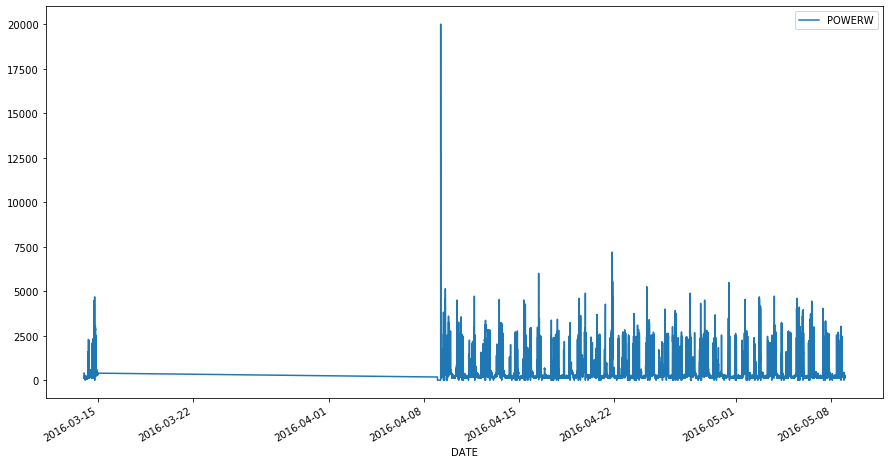

In [311]:
consumption.plot()

## Ausschneiden des nutzbaren Datenbereiches

In [312]:
consumption.loc['2016-03-22':]

,POWERW
DATE,
2016-04-09 00:00:23,180
2016-04-09 00:00:59,1
2016-04-09 00:01:35,1
2016-04-09 00:02:08,1
2016-04-09 00:02:40,1
...,...
2016-05-08 23:57:43,130
2016-05-08 23:58:16,116
2016-05-08 23:58:49,116


In [313]:
consumption = consumption.loc['2016-04-10':]

In [314]:
consumption.head()

,POWERW
DATE,
2016-04-10 00:00:24,560
2016-04-10 00:01:00,567
2016-04-10 00:01:37,570
2016-04-10 00:02:10,570
2016-04-10 00:02:42,567


## Resampling auf 1 Minuten Stützstellen

Mehr Information zur resampling Funktion kann zum Beispiel hier gefunden werden:
https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

In [320]:
#
# Resampling erzeugt neue Stützpunkte im Minutentakt
# Die Mean Funktion ermittelt den neuen Wert als Mittelwert der vorherigen Werte
#
consumption = consumption.resample('1min').mean()

In [321]:
day = consumption.loc['2016-04-10 00:00:00':'2016-04-11 00:00:00']

In [322]:
day.tail()

,POWERW
DATE,
2016-04-10 23:56:00,137.5
2016-04-10 23:57:00,135.0
2016-04-10 23:58:00,136.0
2016-04-10 23:59:00,137.5
2016-04-11 00:00:00,139.0


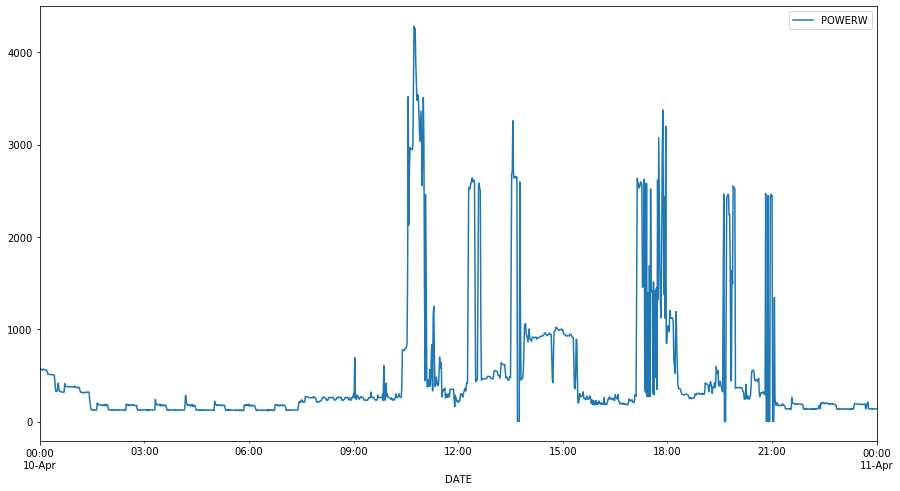

In [323]:
day.plot()

In [337]:
day15 = day.resample('15min').mean()

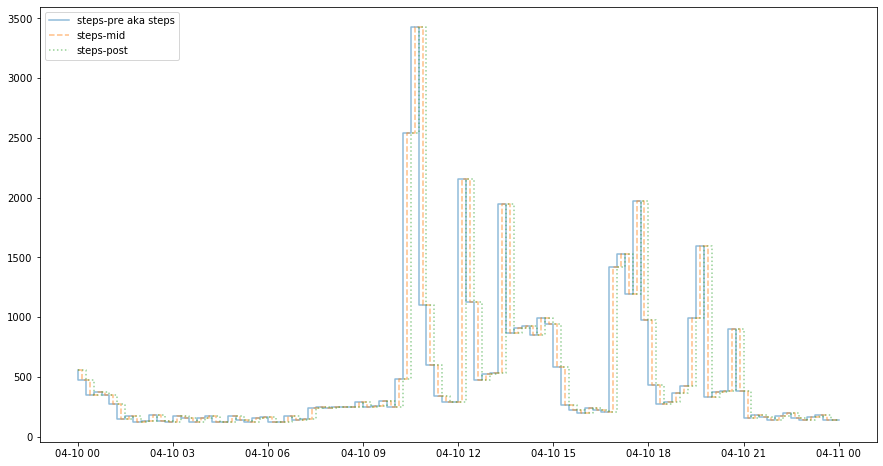

In [338]:
plt.plot(day15, drawstyle='steps', linestyle='-', label='steps-pre aka steps', alpha=0.5,)
plt.plot(day15, drawstyle='steps-mid', linestyle='--', label='steps-mid', alpha=0.5,)
plt.plot(day15, drawstyle='steps-post', linestyle=':', label='steps-post', alpha=0.5,)
plt.legend(loc='upper left')
plt.show()

Es ist sehr wichtig zu wissen, die die Daten in Relation zum Zeitpunkt zu verstehen sind. War der Wert **vor** dem Zeitpunkt gültig (steps-pre), oder startet der Wert zu diesem Zeitpunkt (steps-post), oder liegt der Zeitpunkt in der Mitte (steps-mid).